### K-Colorability

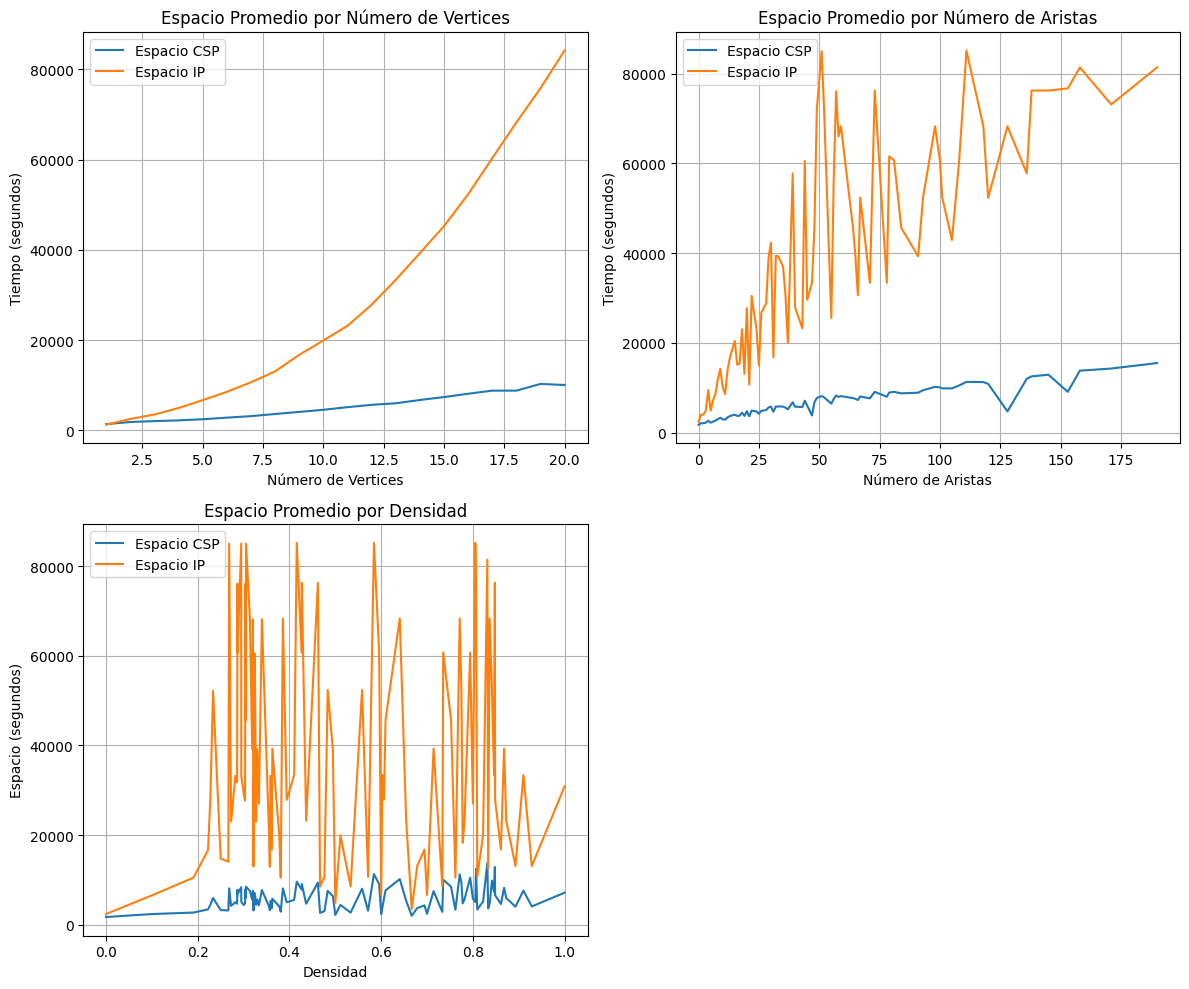

In [8]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

if os.path.exists('K_Colorability/memory.json'):
        # Leer el contenido existente del archivo JSON
        with open('K_Colorability/memory.json', 'r') as f:
            datos = json.load(f)
else:
    # Si no existe, inicializar un nuevo diccionario
    datos = {}

tabla = {
    'numero de vertices':[],
    'numero de aristas':[],
    "densidad":[],
    "CSP":[],
    "IP":[]

}

for key in datos.keys():
    n = datos[key]['properties']['vertices']
    m = len(datos[key]['properties']['aristas'])

    tabla['numero de vertices'].append(n)
    tabla['numero de aristas'].append(m)
    tabla["densidad"].append(0 if m==0 else m/(n*(n-1)/2))

    for solution in ['IP','CSP']:
        tabla[solution].append(datos[key][solution])


df = pd.DataFrame(tabla)

# Promedios por número de nodos
promedio_tiempo_vertices = df[['numero de vertices', 'CSP', 'IP']].groupby('numero de vertices').mean()

# Promedios por número de aristas
promedio_tiempo_aristas = df[['numero de aristas', 'CSP', 'IP']].groupby('numero de aristas').mean()


# Promedios por densidad
promedio_tiempo_densidad = df[['densidad', 'CSP', 'IP']].groupby('densidad').mean()


plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1) # (filas, columnas, índice)
plt.plot(promedio_tiempo_vertices.index, promedio_tiempo_vertices['CSP'], label='Espacio CSP')
plt.plot(promedio_tiempo_vertices.index, promedio_tiempo_vertices['IP'], label='Espacio IP')
plt.title('Espacio Promedio por Número de Vertices')
plt.xlabel('Número de Vertices')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Segunda gráfica: Tiempos promedio por número de aristas
plt.subplot(2, 2, 2)
plt.plot(promedio_tiempo_aristas.index, promedio_tiempo_aristas['CSP'], label='Espacio CSP')
plt.plot(promedio_tiempo_aristas.index, promedio_tiempo_aristas['IP'], label='Espacio IP')
plt.title('Espacio Promedio por Número de Aristas')
plt.xlabel('Número de Aristas')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Tercera gráfica: Tiempos promedio por densidad
plt.subplot(2, 2, 3) # (filas, columnas, índice)
plt.plot(promedio_tiempo_densidad.index, promedio_tiempo_densidad['CSP'], label='Espacio CSP')
plt.plot(promedio_tiempo_densidad.index, promedio_tiempo_densidad['IP'], label='Espacio IP')
plt.title('Espacio Promedio por Densidad')
plt.xlabel('Densidad')
plt.ylabel('Espacio (segundos)')
plt.legend()
plt.grid()


# Mostrar las gráficas
plt.tight_layout()
plt.show()


### Traveling Salesman Problem

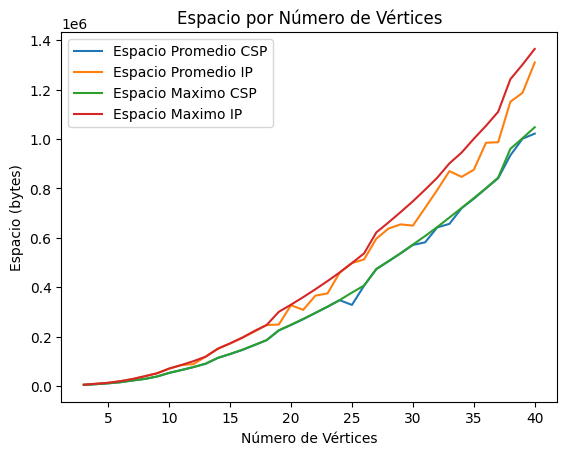

In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

if os.path.exists('TSP/memory.json'):
        # Leer el contenido existente del archivo JSON
        with open('TSP/memory.json', 'r') as f:
            datos = json.load(f)
else:
    # Si no existe, inicializar un nuevo diccionario
    datos = {}

tabla = {
    'numero de vertices':[],
    "CSP":[],
    "IP":[]

}

for key in datos.keys():
    n = datos[key]['properties']['vertices']

    tabla['numero de vertices'].append(n)

    for solution in ['IP','CSP']:
        tabla[solution].append(datos[key][solution])


df = pd.DataFrame(tabla)

# Promedios por número de nodos
promedio_tiempo_vertices = df[['numero de vertices', 'CSP', 'IP']].groupby('numero de vertices').mean()

# Maximos por número de nodos
maximo_tiempo_vertices = df[['numero de vertices', 'CSP', 'IP']].groupby('numero de vertices').max()

plt.plot(promedio_tiempo_vertices.index, promedio_tiempo_vertices['CSP'], label='Espacio Promedio CSP')
plt.plot(promedio_tiempo_vertices.index, promedio_tiempo_vertices['IP'], label='Espacio Promedio IP')
plt.plot(maximo_tiempo_vertices.index, maximo_tiempo_vertices['CSP'], label='Espacio Maximo CSP')
plt.plot(maximo_tiempo_vertices.index, maximo_tiempo_vertices['IP'], label='Espacio Maximo IP')
plt.title('Espacio por Número de Vértices')
plt.xlabel('Número de Vértices')
plt.ylabel('Espacio (bytes)')
plt.legend()
plt.show()


### Bin Packing

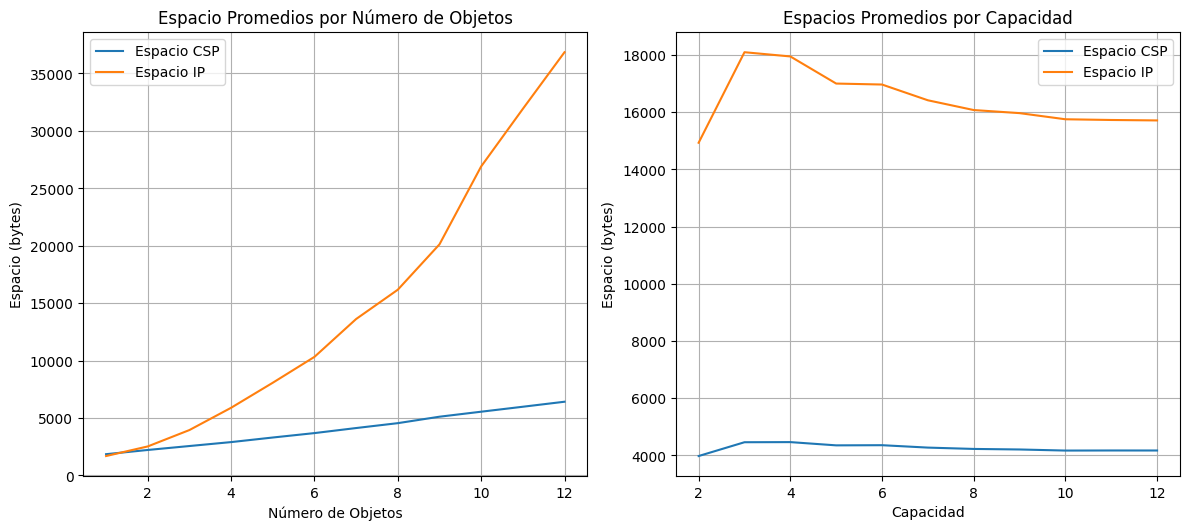

In [11]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

if os.path.exists('BinPacking/memory.json'):
        # Leer el contenido existente del archivo JSON
        with open('BinPacking/memory.json', 'r') as f:
            datos = json.load(f)
else:
    # Si no existe, inicializar un nuevo diccionario
    datos = {}

tabla = {
    'numero de objetos':[],
    "capacidad":[],
    "CSP":[],
    "IP":[]

}

for key in datos.keys():
    n = len(datos[key]['properties']['objects'])
    m = datos[key]['properties']['capacity']

    tabla['numero de objetos'].append(n)
    tabla['capacidad'].append(m)

    for solution in ['IP','CSP']:
        tabla[solution].append(datos[key][solution])


df = pd.DataFrame(tabla)

promedio_tiempo_n = df[['numero de objetos', 'CSP', 'IP']].groupby('numero de objetos').mean()

promedio_tiempo_m = df[['capacidad', 'CSP', 'IP']].groupby('capacidad').mean()

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1) # (filas, columnas, índice)
plt.plot(promedio_tiempo_n.index, promedio_tiempo_n['CSP'], label='Espacio CSP')
plt.plot(promedio_tiempo_n.index, promedio_tiempo_n['IP'], label='Espacio IP')
plt.title('Espacio Promedios por Número de Objetos')
plt.xlabel('Número de Objetos')
plt.ylabel('Espacio (bytes)')
plt.legend()
plt.grid()

# Segunda gráfica: Tiempos promedio por capacidad
plt.subplot(2, 2, 2)
plt.plot(promedio_tiempo_m.index, promedio_tiempo_m['CSP'], label='Espacio CSP')
plt.plot(promedio_tiempo_m.index, promedio_tiempo_m['IP'], label='Espacio IP')
plt.title('Espacios Promedios por Capacidad')
plt.xlabel('Capacidad')
plt.ylabel('Espacio (bytes)')
plt.legend()
plt.grid()


# Mostrar las gráficas
plt.tight_layout()
plt.show()

### Max Clique

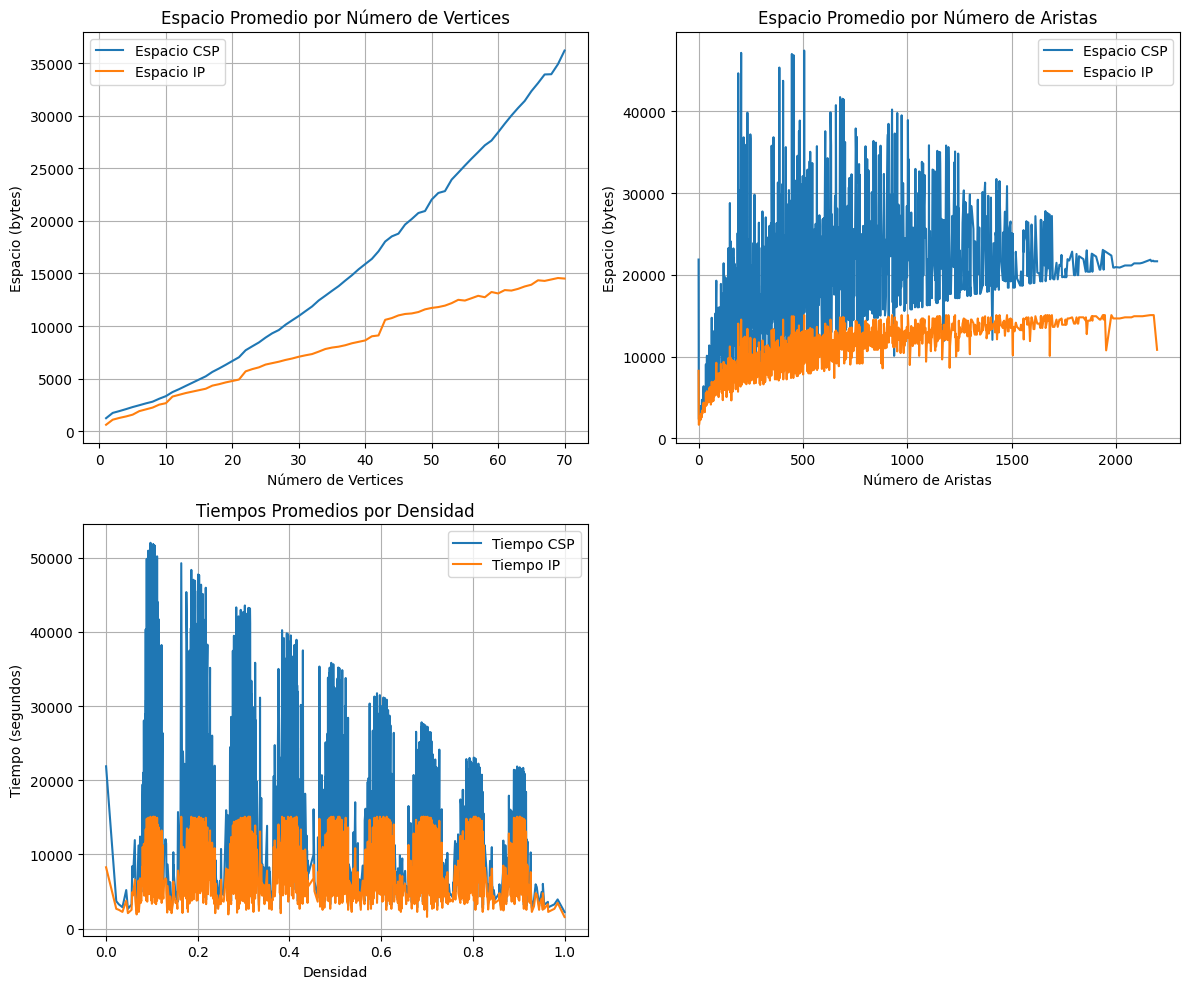

In [2]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

if os.path.exists('MaxClique/memory.json'):
        # Leer el contenido existente del archivo JSON
        with open('MaxClique/memory.json', 'r') as f:
            datos = json.load(f)
else:
    # Si no existe, inicializar un nuevo diccionario
    datos = {}

tabla = {
    'numero de vertices':[],
    'numero de aristas':[],
    "densidad":[],
    "CSP":[],
    "IP":[]

}

for key in datos.keys():
    n = datos[key]['properties']['vertices']
    m = sum([sum(x) for x in datos[key]['properties']['aristas']])/2
    
    tabla['numero de vertices'].append(n)
    tabla['numero de aristas'].append(m)
    tabla["densidad"].append(0 if n<=1 else m/(n*(n-1)/2))

    for solution in ['IP','CSP']:
        tabla[solution].append(datos[key][solution])


df = pd.DataFrame(tabla)

# Promedios por número de nodos
promedio_tiempo_vertices = df[['numero de vertices', 'CSP', 'IP']].groupby('numero de vertices').mean()

# Promedios por número de aristas
promedio_tiempo_aristas = df[['numero de aristas', 'CSP', 'IP']].groupby('numero de aristas').mean()


# Promedios por densidad
promedio_tiempo_densidad = df[['densidad', 'CSP', 'IP']].groupby('densidad').mean()


plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1) # (filas, columnas, índice)
plt.plot(promedio_tiempo_vertices.index, promedio_tiempo_vertices['CSP'], label='Espacio CSP')
plt.plot(promedio_tiempo_vertices.index, promedio_tiempo_vertices['IP'], label='Espacio IP')
plt.title('Espacio Promedio por Número de Vertices')
plt.xlabel('Número de Vertices')
plt.ylabel('Espacio (bytes)')
plt.legend()
plt.grid()

# Segunda gráfica: Tiempos promedio por número de aristas
plt.subplot(2, 2, 2)
plt.plot(promedio_tiempo_aristas.index, promedio_tiempo_aristas['CSP'], label='Espacio CSP')
plt.plot(promedio_tiempo_aristas.index, promedio_tiempo_aristas['IP'], label='Espacio IP')
plt.title('Espacio Promedio por Número de Aristas')
plt.xlabel('Número de Aristas')
plt.ylabel('Espacio (bytes)')
plt.legend()
plt.grid()

# Tercera gráfica: Tiempos promedio por densidad
plt.subplot(2, 2, 3) # (filas, columnas, índice)
plt.plot(promedio_tiempo_densidad.index, promedio_tiempo_densidad['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_densidad.index, promedio_tiempo_densidad['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Densidad')
plt.xlabel('Densidad')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


### Portfolio

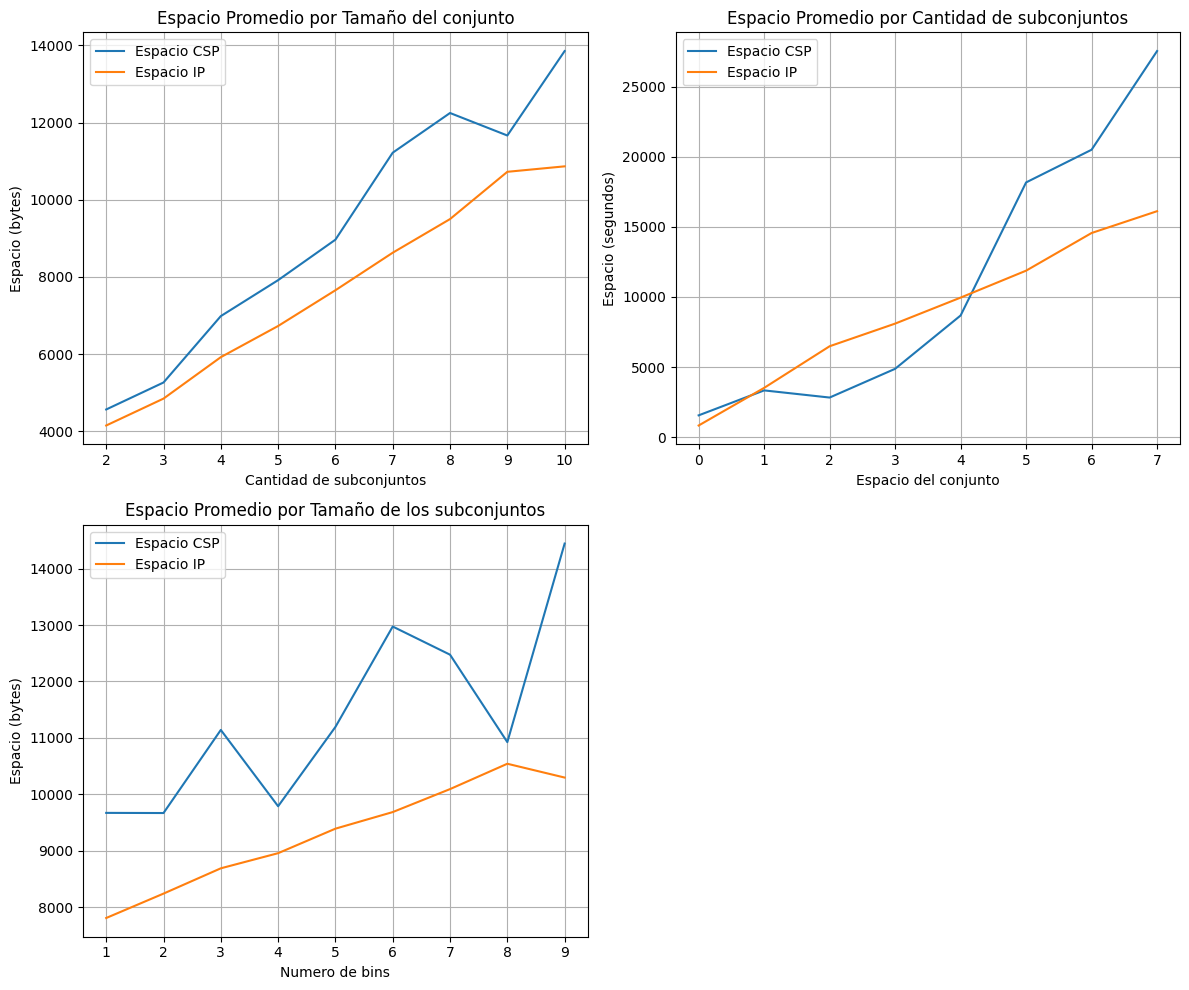

In [5]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

if os.path.exists('Portfolio/memory.json'):
        # Leer el contenido existente del archivo JSON
        with open('Portfolio/memory.json', 'r') as f:
            datos = json.load(f)
else:
    # Si no existe, inicializar un nuevo diccionario
    datos = {}

tabla = {
    'b':[],
    "n":[],
    "r":[],
    "CSP":[],
    "IP":[]
}

for key in datos.keys():
    b = datos[key]['properties']['b']
    n = datos[key]['properties']['n']
    r = datos[key]['properties']['r']

    tabla['b'].append(b)
    tabla['n'].append(n)
    tabla["r"].append(r)

    for solution in ['IP','CSP']:
        tabla[solution].append(datos[key][solution])


df = pd.DataFrame(tabla)

promedio_tiempo_n = df[['n', 'CSP', 'IP']].groupby('n').mean()

promedio_tiempo_b = df[['b', 'CSP', 'IP']].groupby('b').mean()

promedio_tiempo_r = df[['r', 'CSP', 'IP']].groupby('r').mean()


plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 2) # (filas, columnas, índice)
plt.plot(promedio_tiempo_n.index, promedio_tiempo_n['CSP'], label='Espacio CSP')
plt.plot(promedio_tiempo_n.index, promedio_tiempo_n['IP'], label='Espacio IP')
plt.title('Espacio Promedio por Cantidad de subconjuntos')
plt.xlabel('Espacio del conjunto')
plt.ylabel('Espacio (segundos)')
plt.legend()
plt.grid()

# Segunda gráfica: Tiempos promedio por Tamaño del conjunto
plt.subplot(2, 2, 1)
plt.plot(promedio_tiempo_b.index, promedio_tiempo_b['CSP'], label='Espacio CSP')
plt.plot(promedio_tiempo_b.index, promedio_tiempo_b['IP'], label='Espacio IP')
plt.title('Espacio Promedio por Tamaño del conjunto')
plt.xlabel('Cantidad de subconjuntos')
plt.ylabel('Espacio (bytes)')
plt.legend()
plt.grid()

# Tercera gráfica: Tiempos promedio por Tamaño de los subconjuntos
plt.subplot(2, 2, 3) # (filas, columnas, índice)
plt.plot(promedio_tiempo_r.index, promedio_tiempo_r['CSP'], label='Espacio CSP')
plt.plot(promedio_tiempo_r.index, promedio_tiempo_r['IP'], label='Espacio IP')
plt.title('Espacio Promedio por Tamaño de los subconjuntos')
plt.xlabel('Numero de bins')
plt.ylabel('Espacio (bytes)')
plt.legend()
plt.grid()


# Mostrar las gráficas
plt.tight_layout()
plt.show()

### VRP

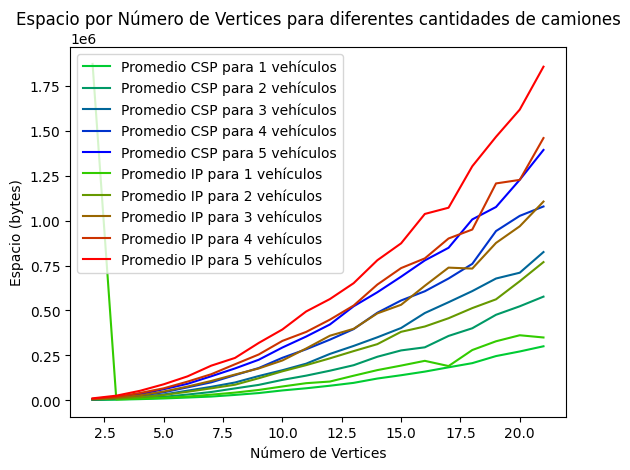

In [6]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

if os.path.exists('VRP/memory.json'):
        # Leer el contenido existente del archivo JSON
        with open('VRP/memory.json', 'r') as f:
            datos = json.load(f)
else:
    # Si no existe, inicializar un nuevo diccionario
    datos = {}

tabla = {
    'numero de vehículos':[],
    'tamaño':[],
    "CSP":[],
    "IP":[]

}

for key in datos.keys():
    n = datos[key]['properties']['num_vehicles']

    tabla['numero de vehículos'].append(n)
    m = len(datos[key]['properties']['distance_matrix'])

    tabla['tamaño'].append(m)

    for solution in ['IP','CSP']:
        tabla[solution].append(datos[key][solution])


df = pd.DataFrame(tabla)

# Promedios por número de nodos
promedio_tiempos = df.groupby(['numero de vehículos','tamaño']).mean()

promedio_por_numero_camiones = [sub_df for sub_df in df.groupby('numero de vehículos')]

i=1
color_index=255/(len(promedio_por_numero_camiones))

for caso, promedio_por_caso in promedio_por_numero_camiones:
    color = math.ceil(color_index*i)
    caso_por_tamanno = promedio_por_caso.groupby('tamaño').mean()
    plt.plot(
        caso_por_tamanno.index, 
        caso_por_tamanno['CSP'], 
        label=f'Promedio CSP para {caso} vehículos',
        color=f"#00{0 if 255-color<16 else ''}{hex(255-color)[2:]}{0 if color<16 else ''}{hex(color)[2:]}"
)
    i+=1

i=1

for caso, promedio_por_caso in promedio_por_numero_camiones:
    color = math.ceil(color_index*i)
    caso_por_tamanno = promedio_por_caso.groupby('tamaño').mean()
    plt.plot(
        caso_por_tamanno.index, 
        caso_por_tamanno['IP'], 
        label=f'Promedio IP para {caso} vehículos',
        color=f"#{0 if color<16 else ''}{hex(color)[2:]}{0 if 255-color<16 else ''}{hex(255-color)[2:]}00"
    )
    i+=1

plt.title('Espacio por Número de Vertices para diferentes cantidades de camiones')
plt.xlabel('Número de Vertices')
plt.ylabel('Espacio (bytes)')
plt.legend()
plt.show()
